In [166]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import colors
import seaborn as sns                       #visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [39]:
df = pd.read_csv('Customer analysis.csv', sep="\t")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [40]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [41]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [42]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [43]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [44]:
#make dataset from datalake
dataset = df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
              'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
              'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
              'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
              'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
              'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']]

In [135]:
#count children in the house
dataset['Children'] = dataset['Kidhome'] + dataset['Teenhome'] 

#create column age
dataset['Age'] = dt.datetime.today().year - dataset['Year_Birth']

#convert datetime
dataset['Dt_Customer'] = pd.to_datetime(dataset['Dt_Customer'])

#count total product that customer buy
dataset['Sum of the product'] = dataset['MntFishProducts'] + dataset['MntFruits'] + dataset['MntGoldProds'] + dataset['MntMeatProducts'] + dataset['MntSweetProducts'] + dataset['MntWines']

#Deriving living situation by marital status"Alone"
dataset['Living_With']=dataset['Marital_Status'].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Segmenting education levels in three groups
dataset["Education"]=dataset["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#Feature for total members in the householde assum with tagging Partner 2 people in the house
dataset['Family_Size'] = dataset['Living_With'].replace({"Alone": 1, "Partner":2}) + dataset['Children']

#Counting Accepted Campaign
dataset['TotalAcceptedCmp'] = dataset['AcceptedCmp1'] + dataset['AcceptedCmp2'] + dataset['AcceptedCmp3'] + dataset['AcceptedCmp4'] + dataset['AcceptedCmp5'] + dataset['AcceptedLstCmp']

#rename column
dataset = dataset.rename(columns={'Response':'AcceptedLstCmp'})

#Feature pertaining parenthood
dataset["Is_Parent"] = np.where(((dataset['Marital_Status']== 'Married') | (dataset['Marital_Status']=='Together') |
                                 (dataset['Marital_Status']== 'Widow') | (dataset['Marital_Status']=='Divorced')) & (dataset['Children']>= 0), 1 ,0)

In [9]:
dataset['Is_Parent'].value_counts()

1    1753
0     487
Name: Is_Parent, dtype: int64

In [10]:
dataset['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [48]:
dates = []
for i in dataset["Dt_Customer"]:
    i = i.date()
    dates.append(i) 

In [49]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
dataset["Customer_For"] = days
dataset["Customer_For"] = pd.to_numeric(dataset["Customer_For"], errors="coerce")

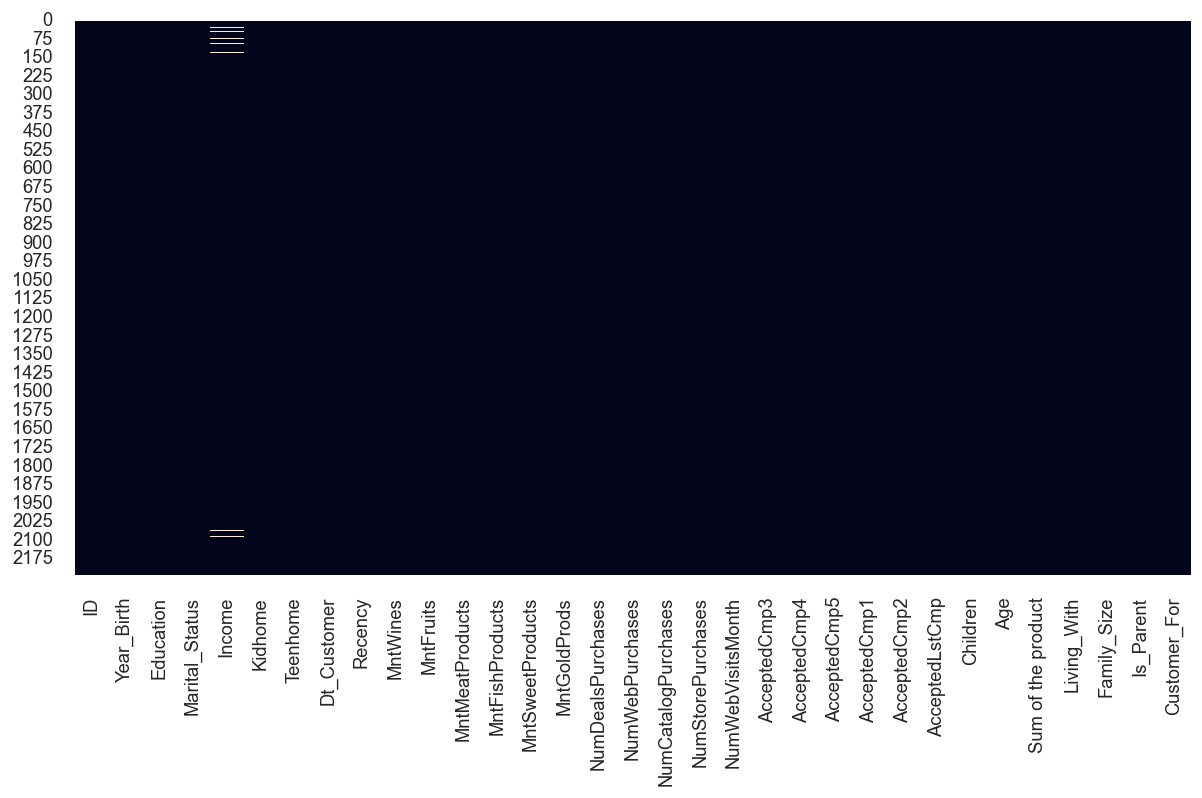

In [50]:
#checking null value
sns.set(rc={'figure.dpi': 120, 'figure.figsize': (12, 6)})
sns.heatmap(dataset.isnull(), cbar=False)
plt.show()

In [51]:
#FILL THE MISSING VALUES WITH THE MEDIAN VALUES.. 
dataset['Income']=dataset['Income'].fillna(dataset['Income'].median())

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 1440x720 with 0 Axes>

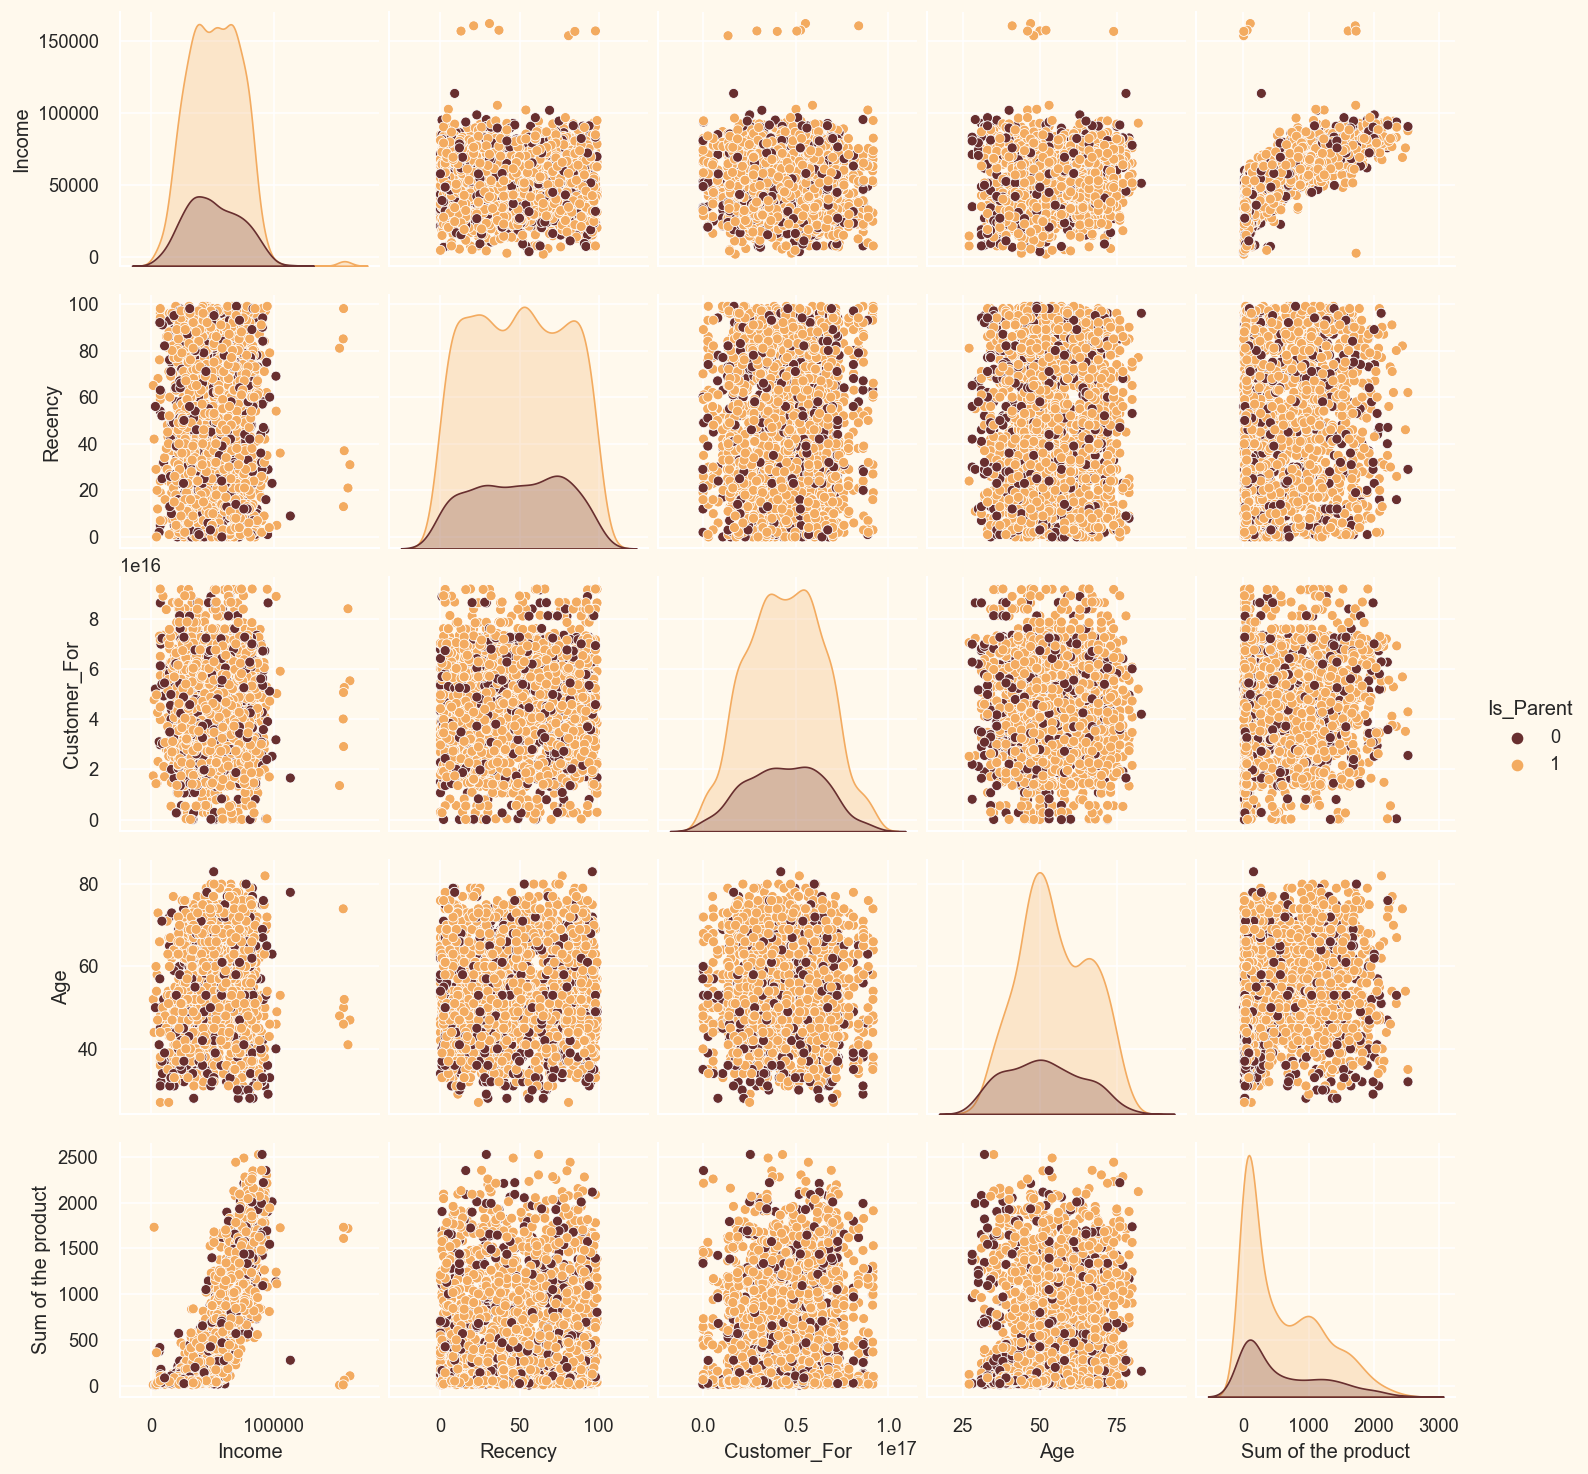

In [82]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Sum of the product", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(dataset[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

In [56]:
#Dropping the outliers by setting a cap on Age and income. 
dataset = dataset[(dataset["Age"]<90)]
dataset = dataset[(dataset["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(dataset))

The total number of data-points after removing the outliers are: 2236


In [190]:
dataset['Education'].head()

0    0
1    0
2    0
3    0
4    1
Name: Education, dtype: int32

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_32196\2646380404.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, fmt='.0%')


<AxesSubplot: >

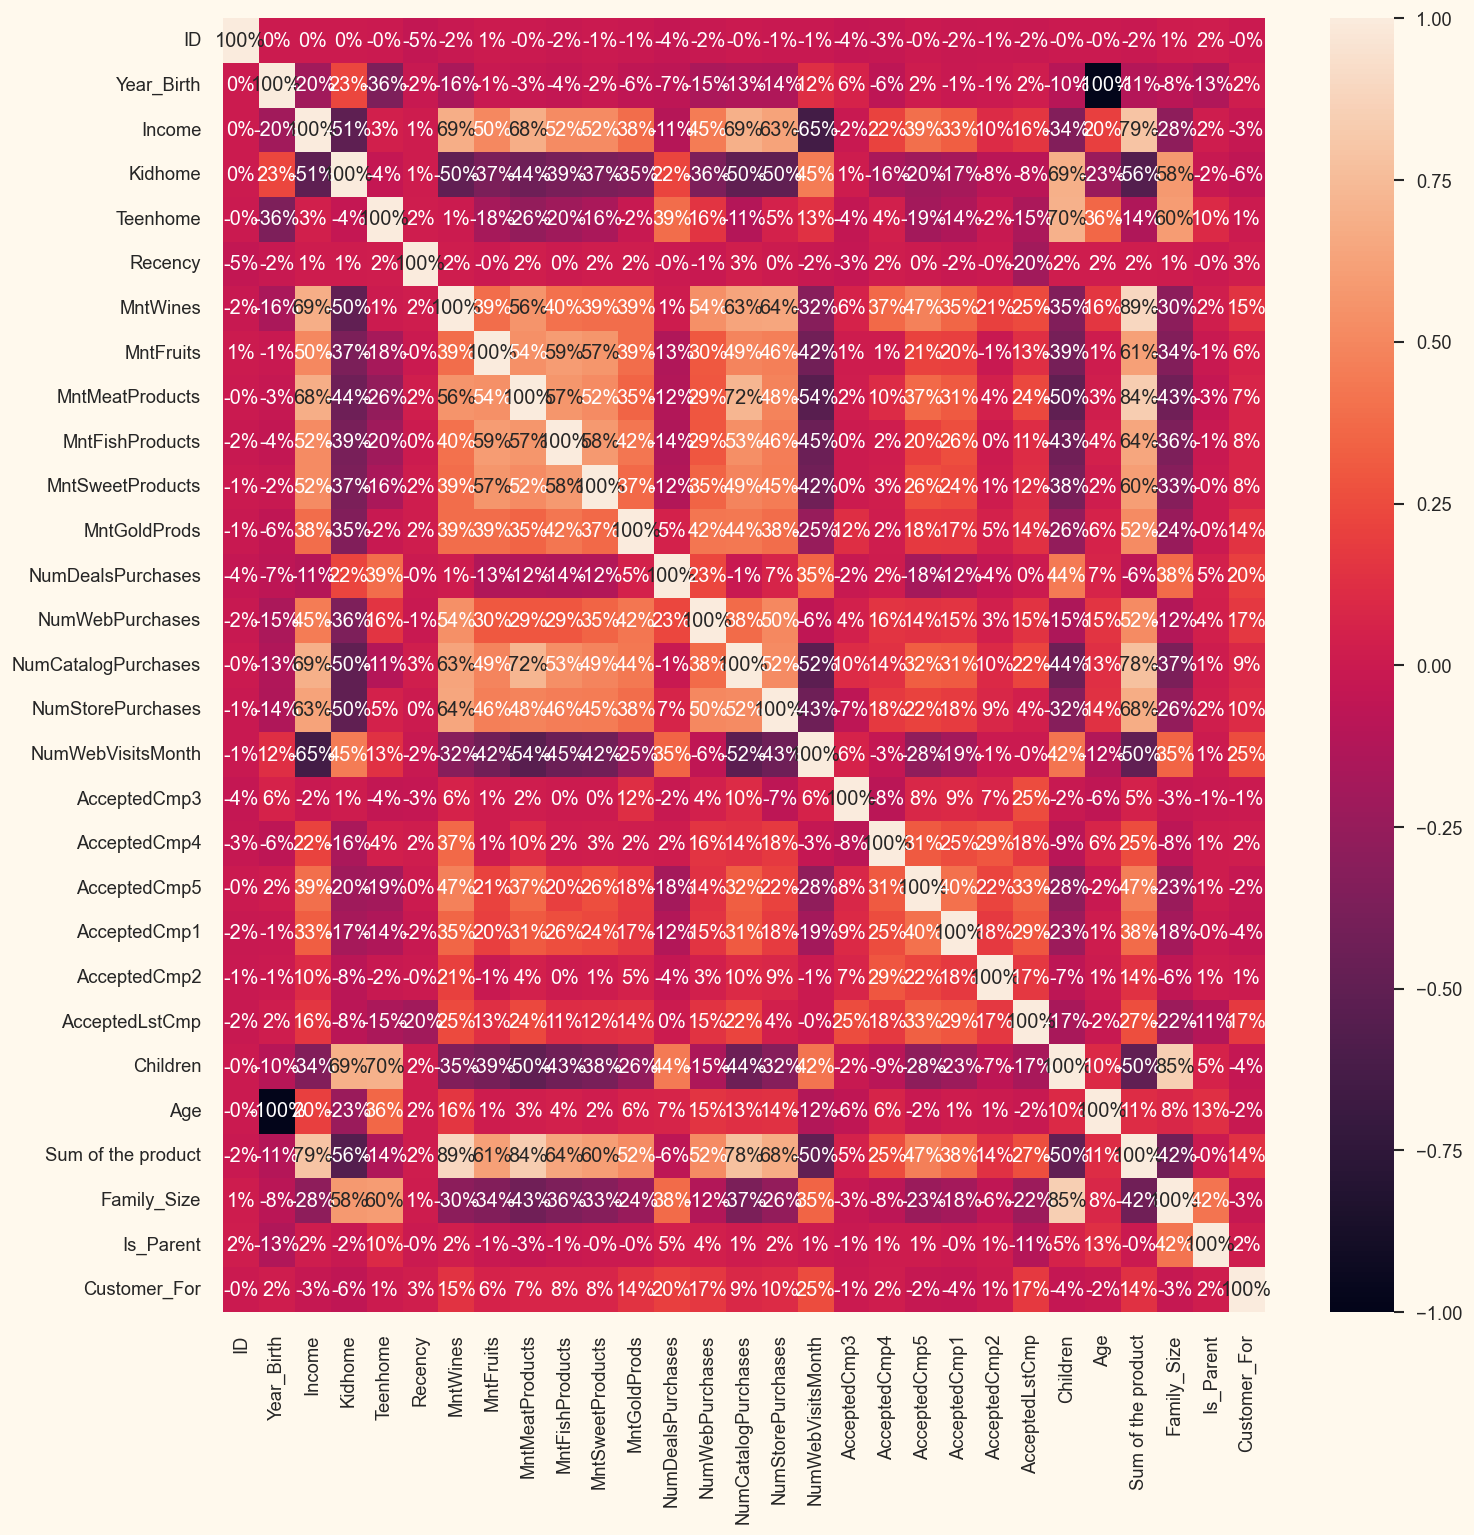

In [21]:
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(dataset.corr(), annot=True, fmt='.0%')

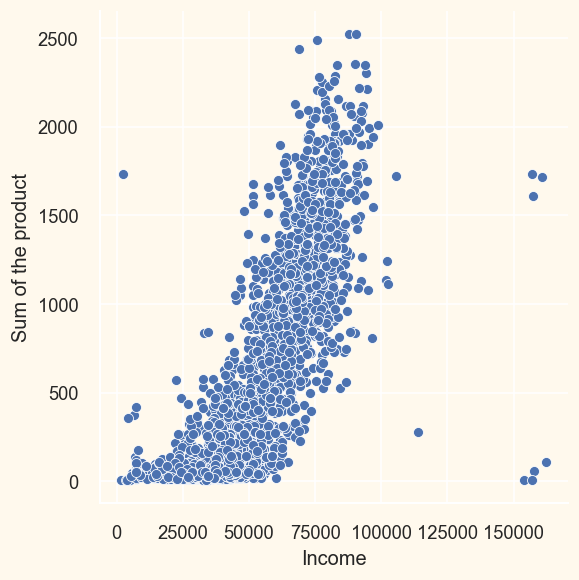

In [66]:
sns.relplot(
    data=dataset,
    x='Income', y='Sum of the product'
)

In [125]:
test = pd.crosstab(dataset['Is_Parent'], dataset['Sum of the product'], margins=True)
test

Sum of the product  5  6  8  9  10  11  12  13  14  15  ...  2283  2302  2346  \
Is_Parent                                               ...                     
0                   1  0  0  0   1   0   0   1   1   2  ...     0     0     0   
1                   0  2  4  2   4   5   2   5   2   8  ...     1     2     1   
All                 1  2  4  2   5   5   2   6   3  10  ...     1     2     1   

Sum of the product  2349  2352  2440  2486  2524  2525   All  
Is_Parent                                                     
0                      1     0     0     0     0     2   486  
1                      0     1     1     1     1     0  1750  
All                    1     1     1     1     1     2  2236  

[3 rows x 1055 columns]

<AxesSubplot: title={'center': 'How Discount impacts to Spending?'}, xlabel='NumDealsPurchases', ylabel='Sum of the product'>

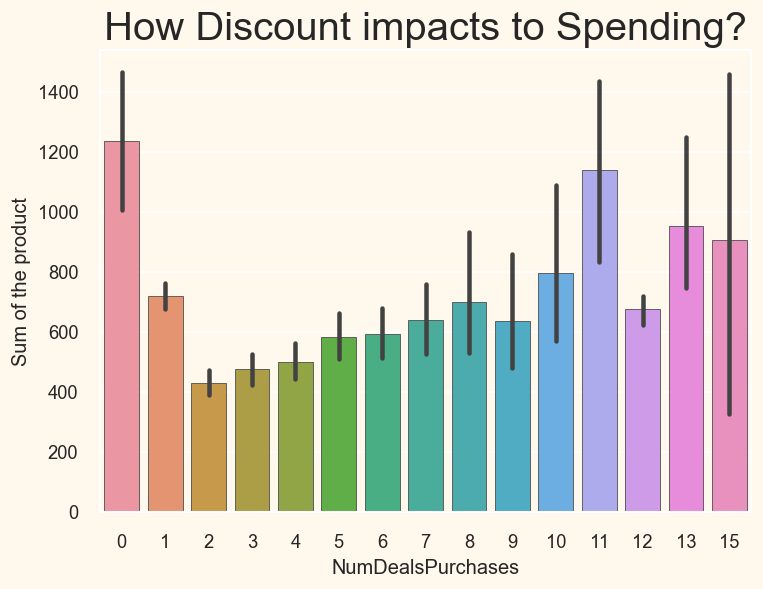

In [137]:
f, ax = plt.subplots(figsize=(7, 5))
plt.title("How Discount impacts to Spending?",fontsize=24)
sns.barplot(data=dataset, x='NumDealsPurchases', y='Sum of the product',edgecolor=".3",
    linewidth=.5)


In [94]:
dataset.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
AcceptedLstCmp                  int64
Children    

In [140]:
dataset['Marital_Status'] = LabelEncoder().fit_transform(dataset['Marital_Status'])
dataset['Education'] = LabelEncoder().fit_transform(dataset['Education'])
dataset['Living_With'] = LabelEncoder().fit_transform(dataset['Living_With'])

In [141]:
dataset.dtypes

ID                              int64
Year_Birth                      int64
Education                       int32
Marital_Status                  int32
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
AcceptedLstCmp                  int64
Children    

In [142]:
#Creating a copy of data
ds = dataset.copy()

# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['Dt_Customer']
ds = ds.drop(cols_del, axis=1)

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [100]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
0 -0.020039   -1.016868   -0.89438        0.251533  0.288947 -0.824939   
1 -1.052682   -1.273264   -0.89438        0.251533 -0.262003  1.032627   
2 -0.446351   -0.333146   -0.89438        1.181168  0.918423 -0.824939   
3  0.182791    1.290693   -0.89438        1.181168 -1.182183  1.032627   
4 -0.081689    1.034298    0.57070       -0.678101  0.296187  1.032627   

   Teenhome   Recency  MntWines  MntFruits  ...  AcceptedCmp1  AcceptedCmp2  \
0 -0.930615  0.306856  0.983228   1.554170  ...     -0.262362     -0.116616   
1  0.905974 -0.383971 -0.871064  -0.636431  ...     -0.262362     -0.116616   
2 -0.930615 -0.798467  0.362159   0.572177  ...     -0.262362     -0.116616   
3 -0.930615 -0.798467 -0.871064  -0.560893  ...     -0.262362     -0.116616   
4 -0.930615  1.550344 -0.389661   0.421101  ...     -0.262362     -0.116616   

   AcceptedLstCmp  Children  Sum of the product  Living_With  Family_Size  \
0        2.386338 -1.264308            1.680176    -1.347635    -1.758810   
1       -0.419052  1.395139           -0.962202    -1.347635     0.445618   
2       -0.419052 -1.264308            0.282541     0.742041    -0.656596   
3       -0.419052  0.065416           -0.918994     0.742041     0.445618   
4       -0.419052  0.065416           -0.305762     0.742041     0.445618   

   Is_Parent       Age  Customer_For  
0  -1.897583  1.016868      1.975467  
1  -1.897583  1.273264     -1.667017  
2   0.526986  0.333146     -0.172996  
3   0.526986 -1.290693     -1.925349  
4   0.526986 -1.034298     -0.823131  

[5 rows x 32 columns]

In [163]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2236.0  2.319750e-16  2.924712 -5.781837 -2.530847 -0.860008  2.194475   
col2  2236.0  0.000000e+00  1.758749 -4.978101 -1.320090  0.073311  1.319101   
col3  2236.0  2.859966e-17  1.614258 -3.647754 -0.876606 -0.205725  0.479047   

           max  
col1  9.030169  
col2  5.693066  
col3  9.016278

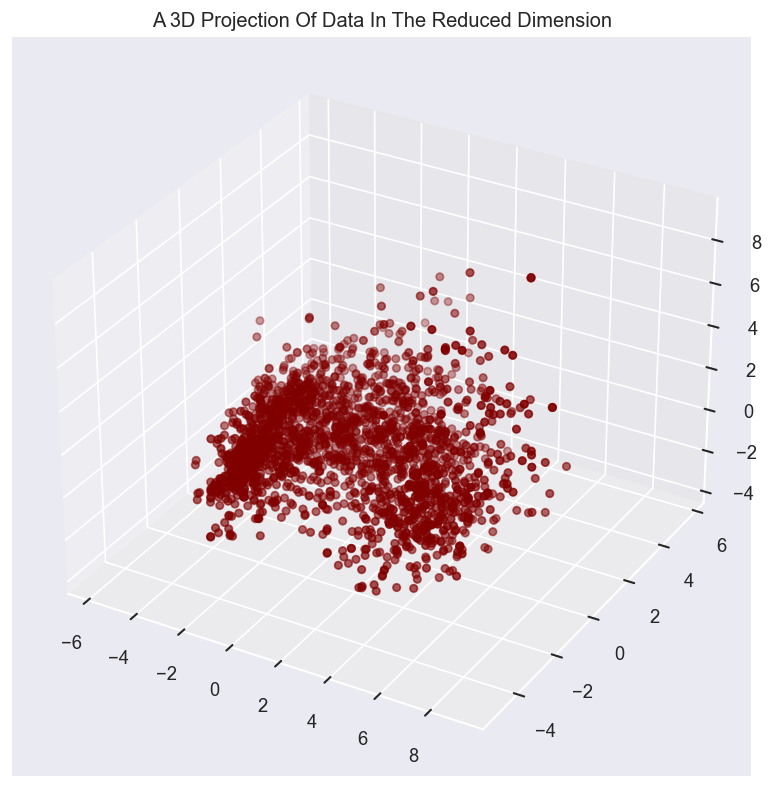

In [164]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


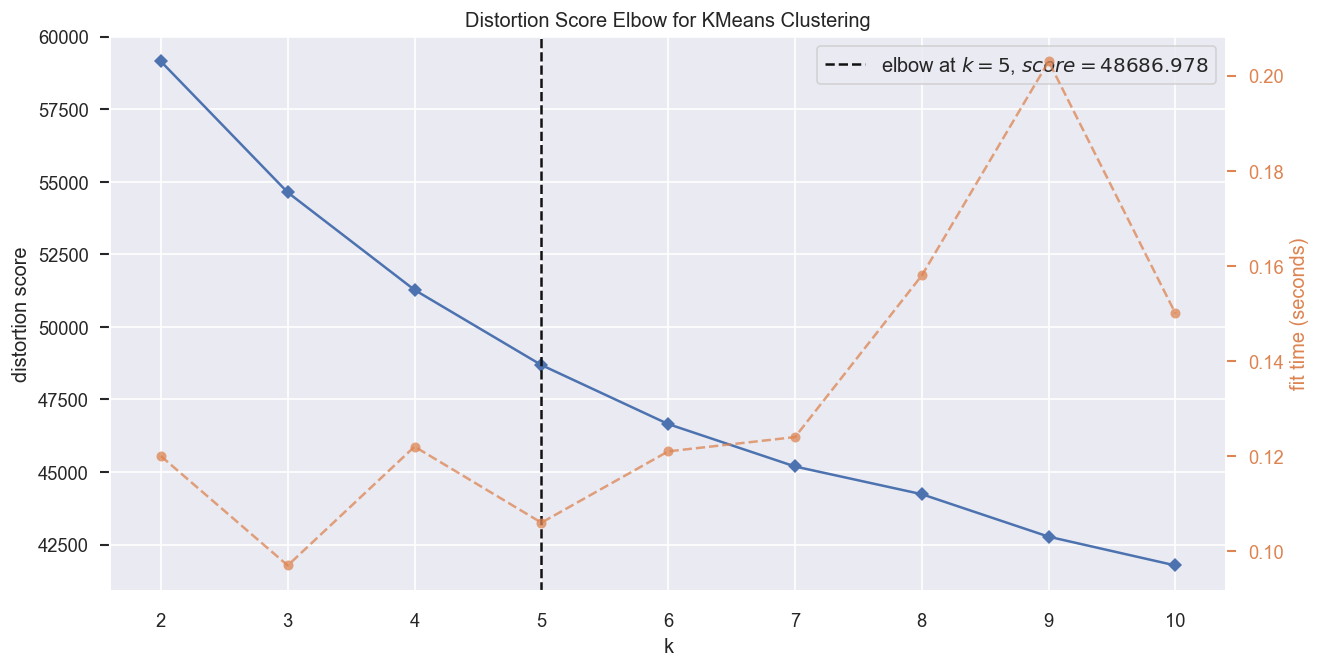

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [165]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(scaled_ds)
Elbow_M.show()

In [167]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
dataset["Clusters"]= yhat_AC

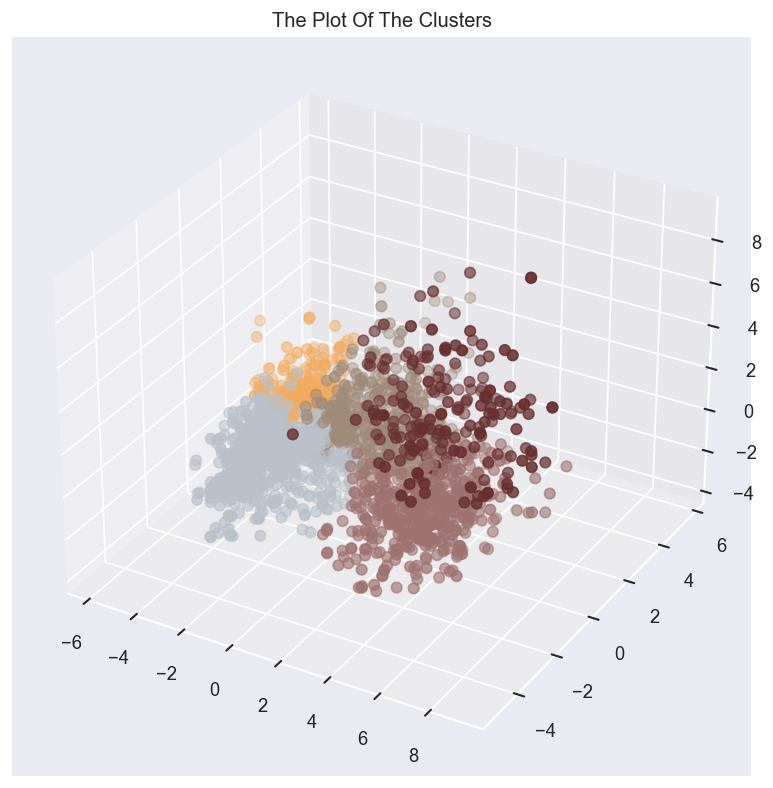

In [168]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

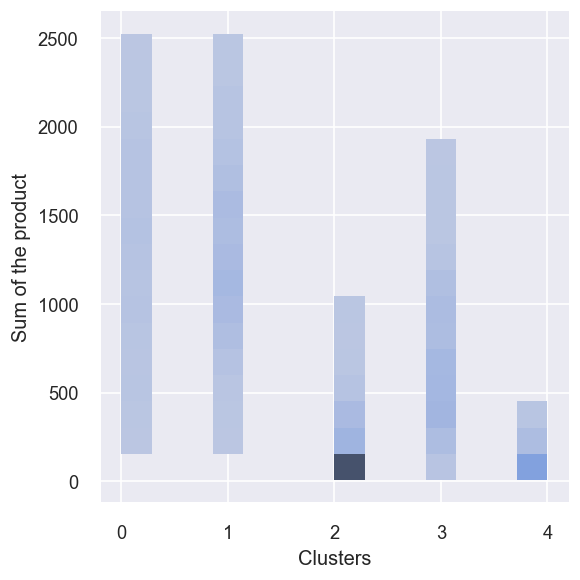

In [238]:
bottoms = dataset['Sum of the product'].min()
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.displot(x=dataset['Clusters'], y=dataset['Sum of the product'])
#pl.set_title("Distribution Of The Clusters")
plt.show()

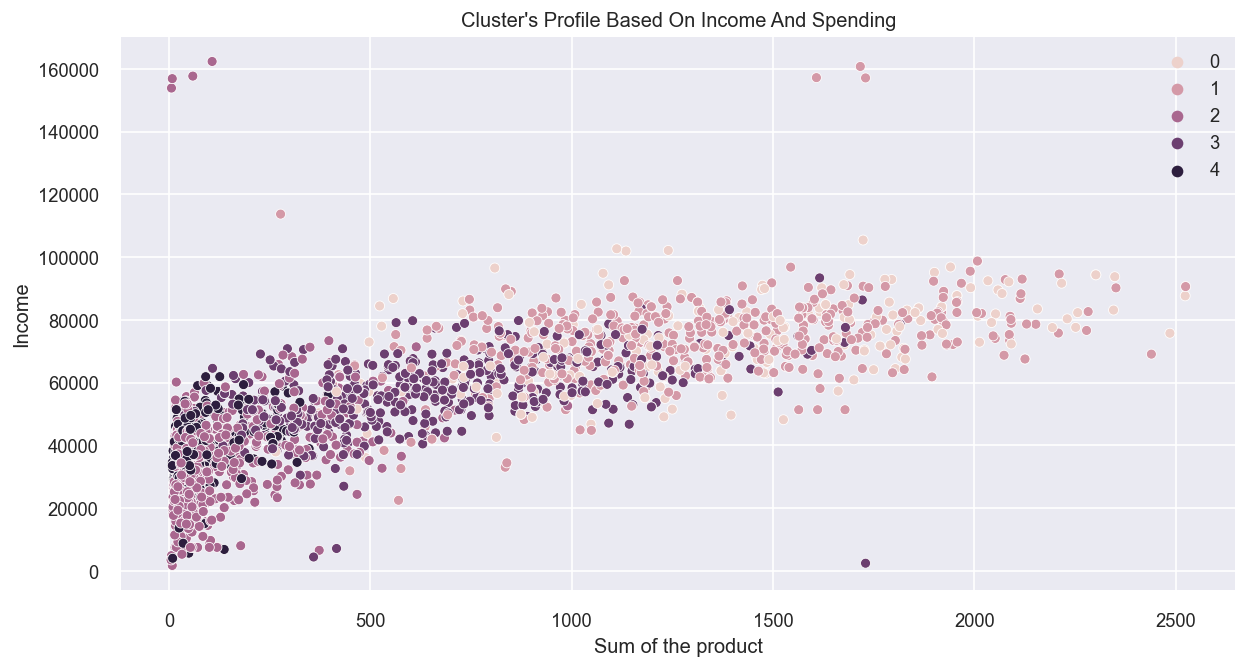

In [172]:
pl = sns.scatterplot(data = dataset,x=dataset['Sum of the product'], y=dataset["Income"],hue=dataset["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

c:\Users\Lenovo\Yudha\venv\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Lenovo\Yudha\venv\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Lenovo\Yudha\venv\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Lenovo\Yudha\venv\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 70.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Lenovo\Yudha\venv\lib\site-packages\seaborn\categorical.py:3540: UserWarning: 11.0% of t

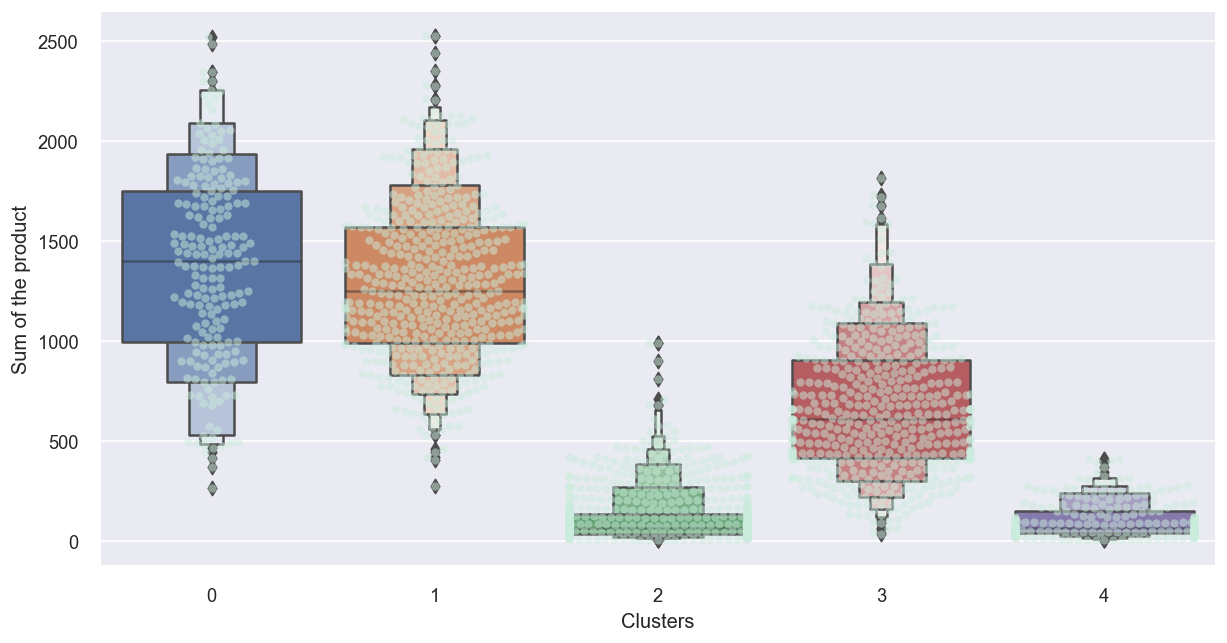

In [174]:
plt.figure()
pl=sns.swarmplot(x=dataset["Clusters"], y=dataset['Sum of the product'], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=dataset["Clusters"], y=dataset['Sum of the product'])
plt.show()

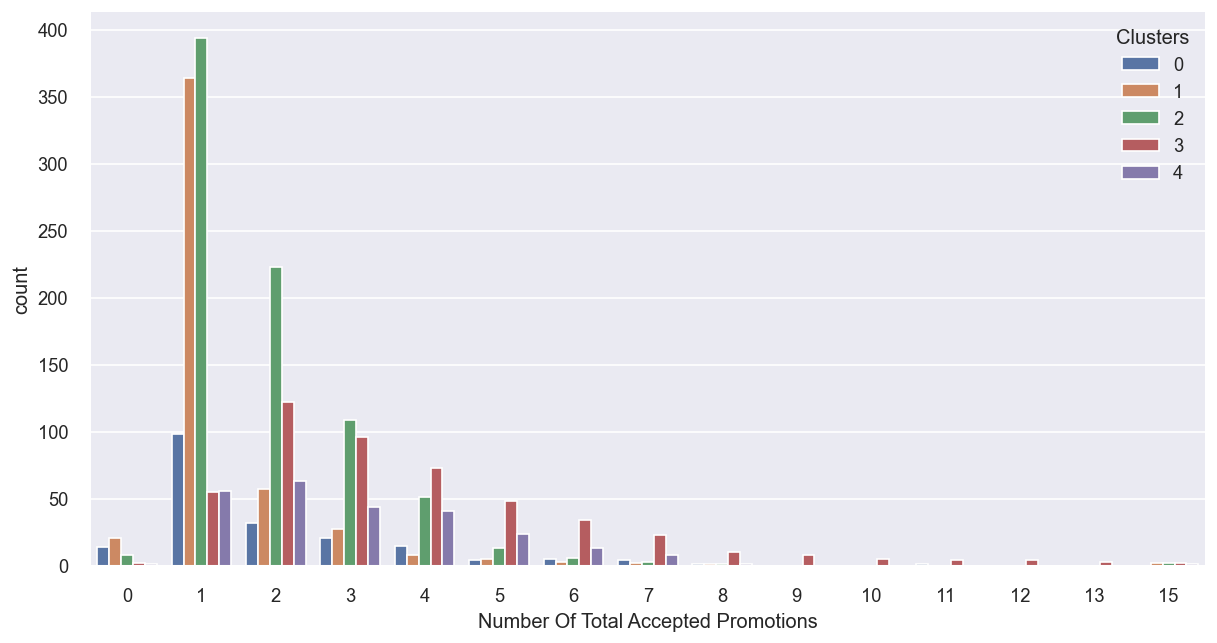

In [184]:
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=dataset['NumDealsPurchases'],hue=dataset["Clusters"])
#pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

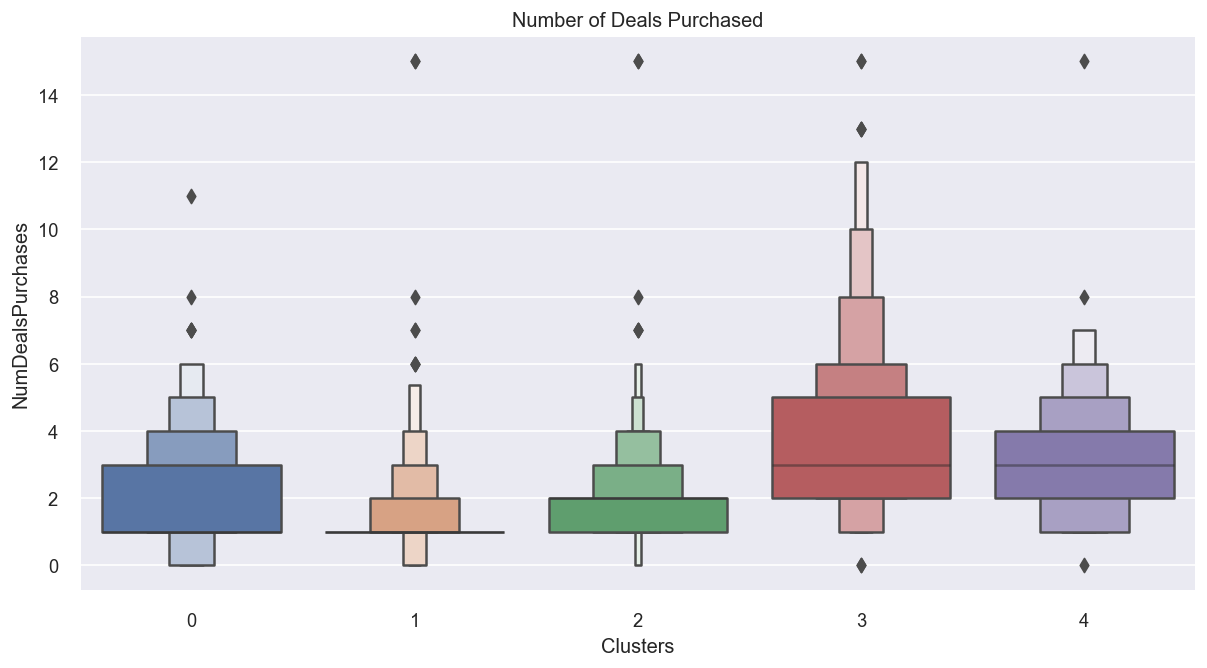

In [176]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=dataset["NumDealsPurchases"],x=dataset["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

In [ ]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=dataset[i], y=dataset['Sum of the product'], hue =dataset["Clusters"], kind="kde")
    plt.show()

<Figure size 1440x720 with 0 Axes>

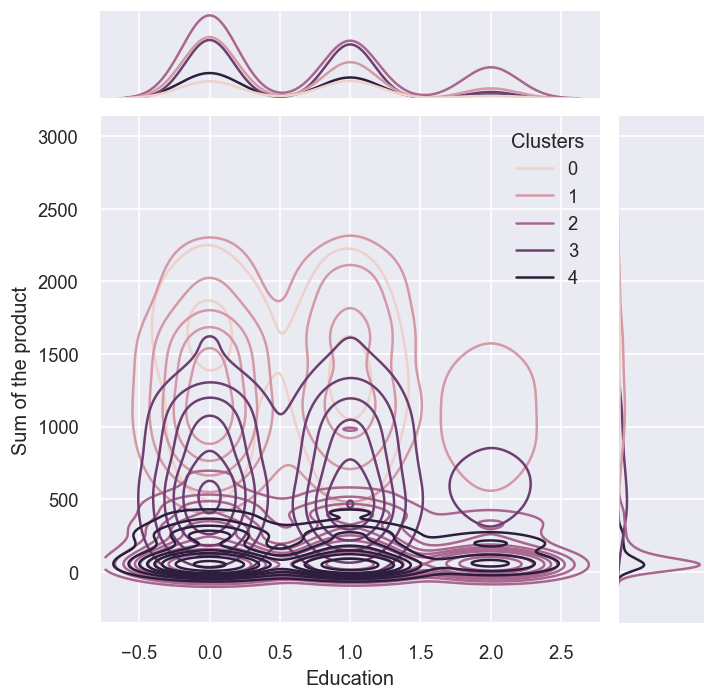

In [188]:
plt.figure()
sns.jointplot(x=dataset['Education'], y=dataset['Sum of the product'], hue =dataset["Clusters"], kind="kde")
plt.show()

In [224]:

cek = dataset[dataset['Clusters']==1]
#test = ['Age','Income', 'Sum of the product']

#for i in test:
  #  print('Min '+i, cek[i].min())

In [225]:
cek['Is_Parent'].value_counts()

1    359
0    131
Name: Is_Parent, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7484\2646380404.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, fmt='.0%')


<AxesSubplot: >

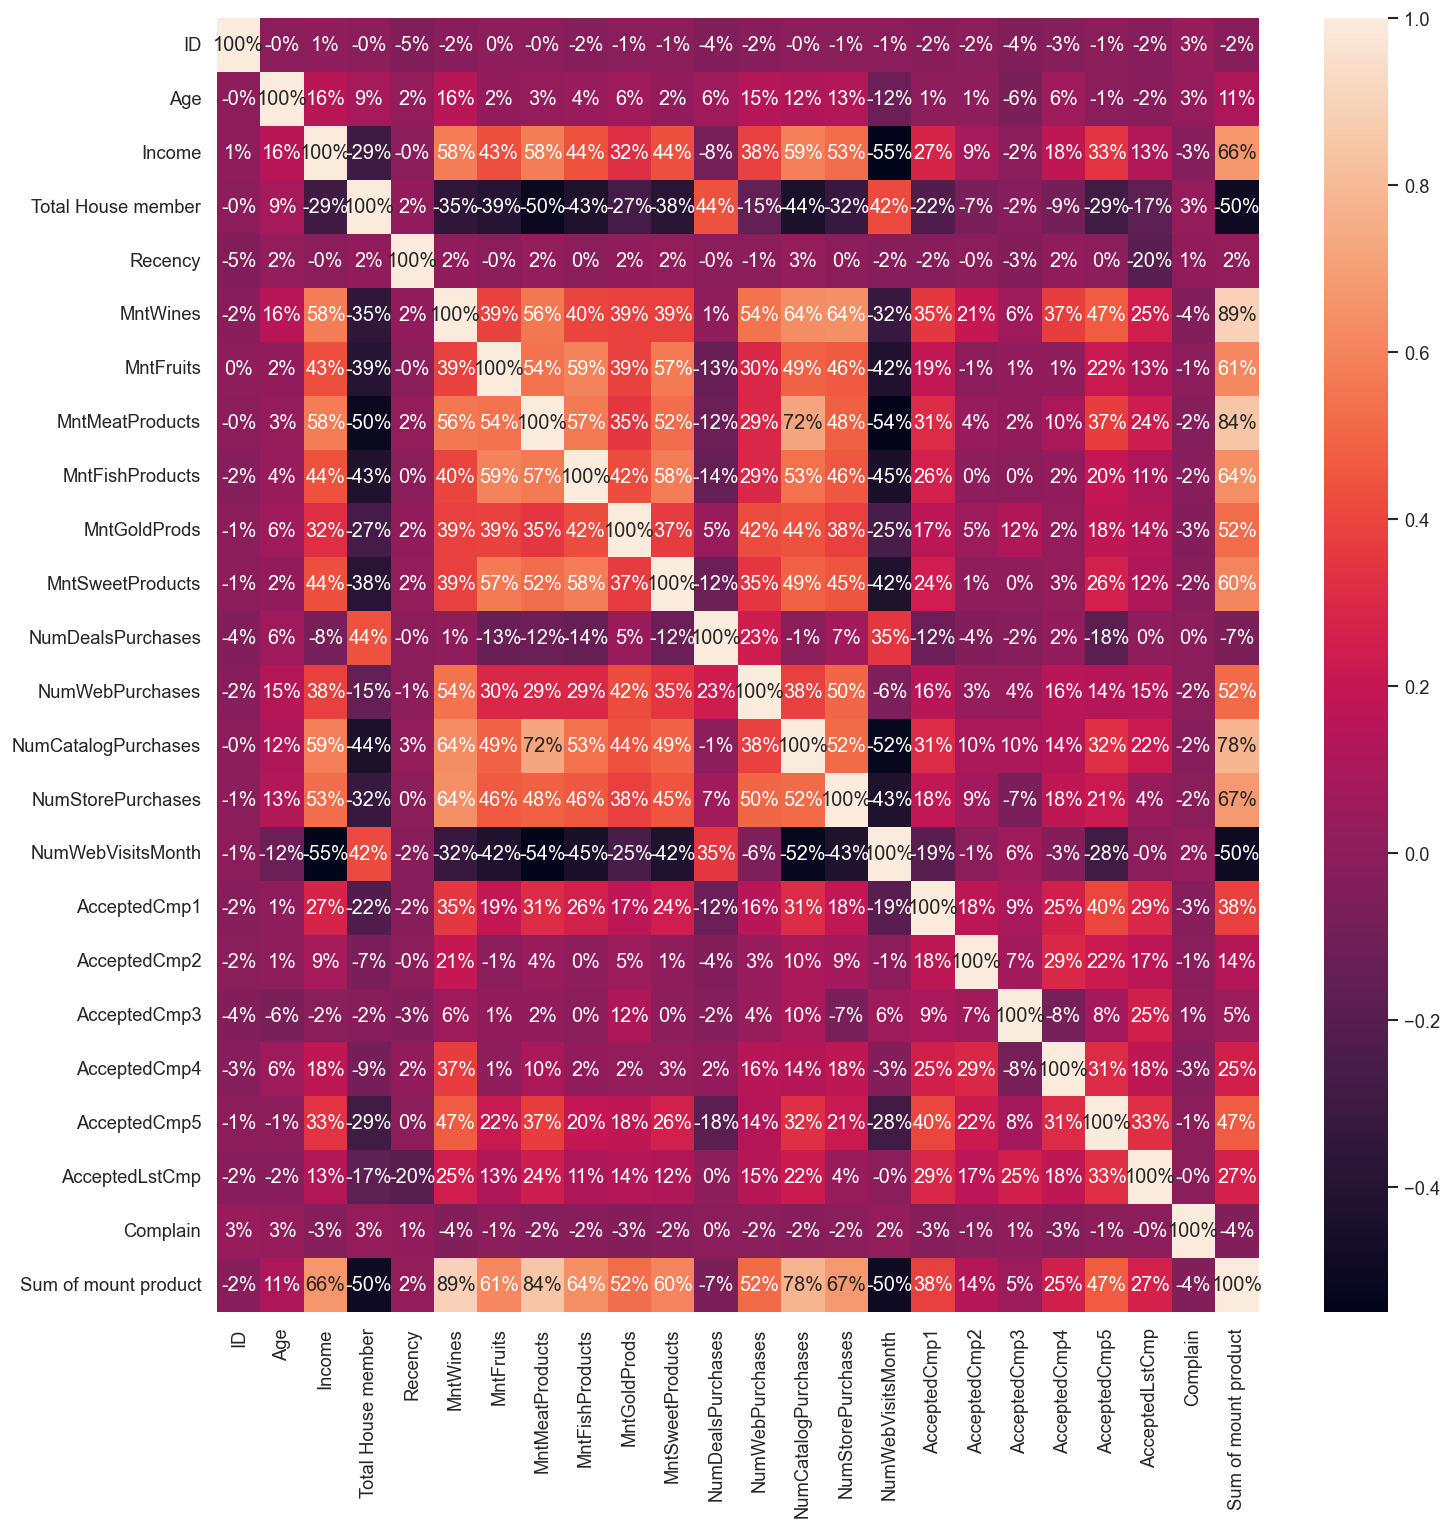

In [76]:
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(dataset.corr(), annot=True, fmt='.0%')

In [150]:
basketdataset = dataset[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntSweetProducts', 'Sum of the product', 'TotalAcceptedCmp', 'NumDealsPurchases']]

<AxesSubplot: >

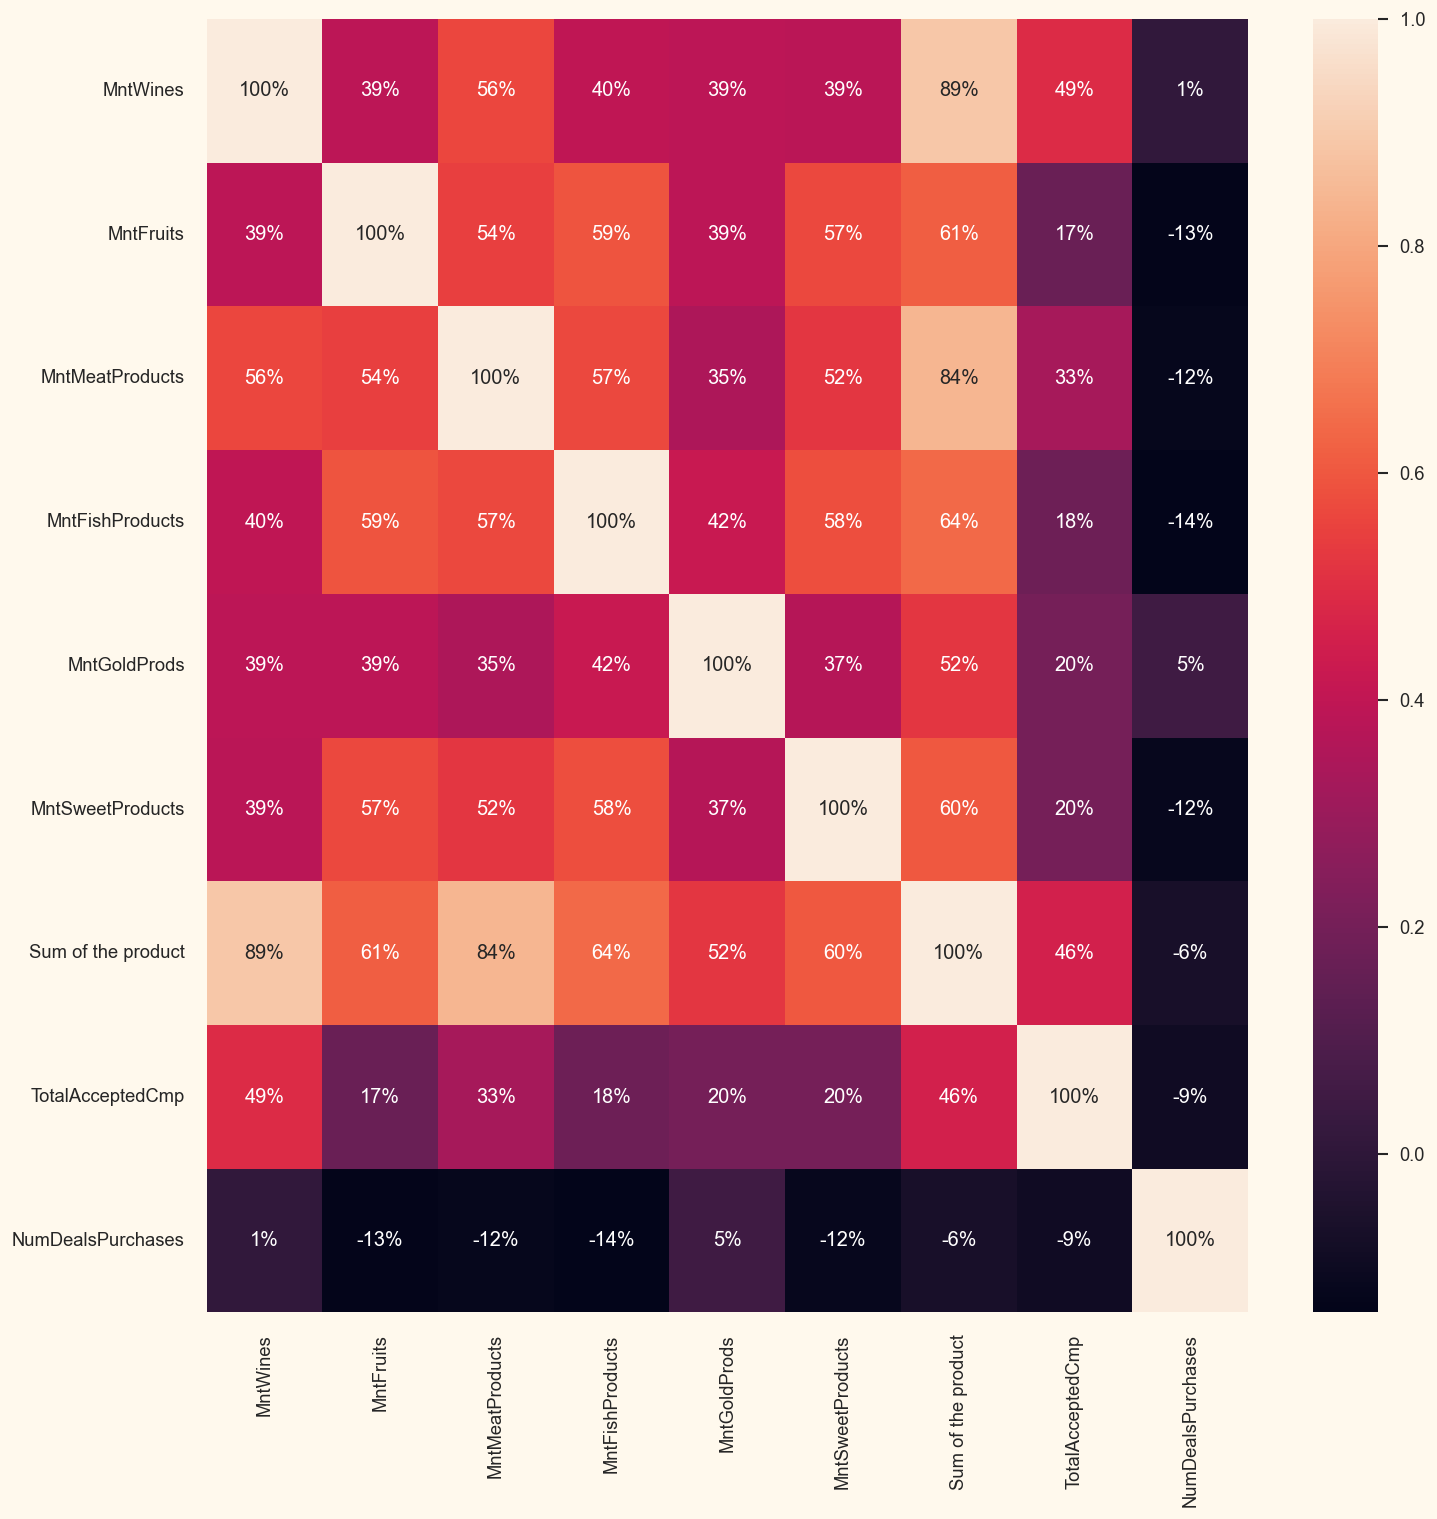

In [151]:
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(basketdataset.corr(), annot=True, fmt='.0%')

In [160]:
numpurchasescorr = dataset[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Sum of the product','TotalAcceptedCmp']]

<AxesSubplot: >

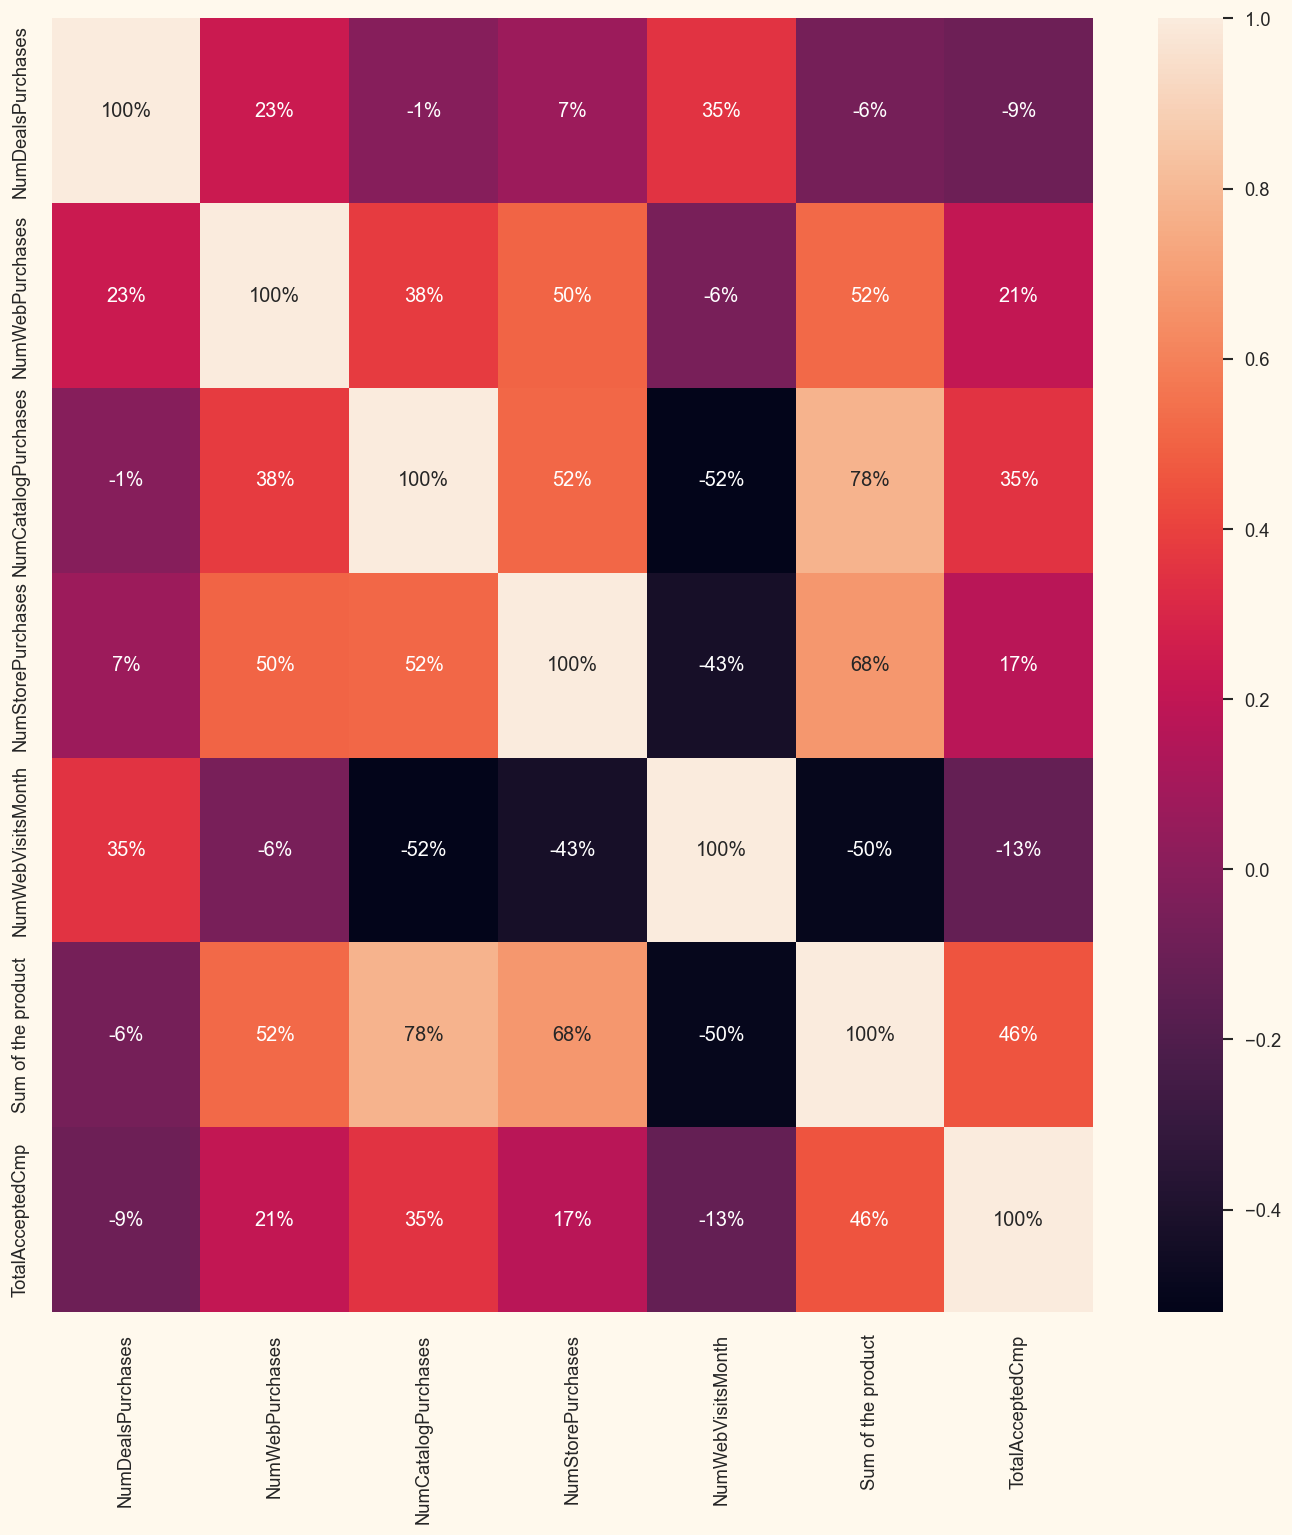

In [161]:
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(numpurchasescorr.corr(), annot=True, fmt='.0%')

In [64]:
promotioncorr = df[[ 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedLstCmp', 'Sum of mount product', 'Recency']]

<AxesSubplot: >

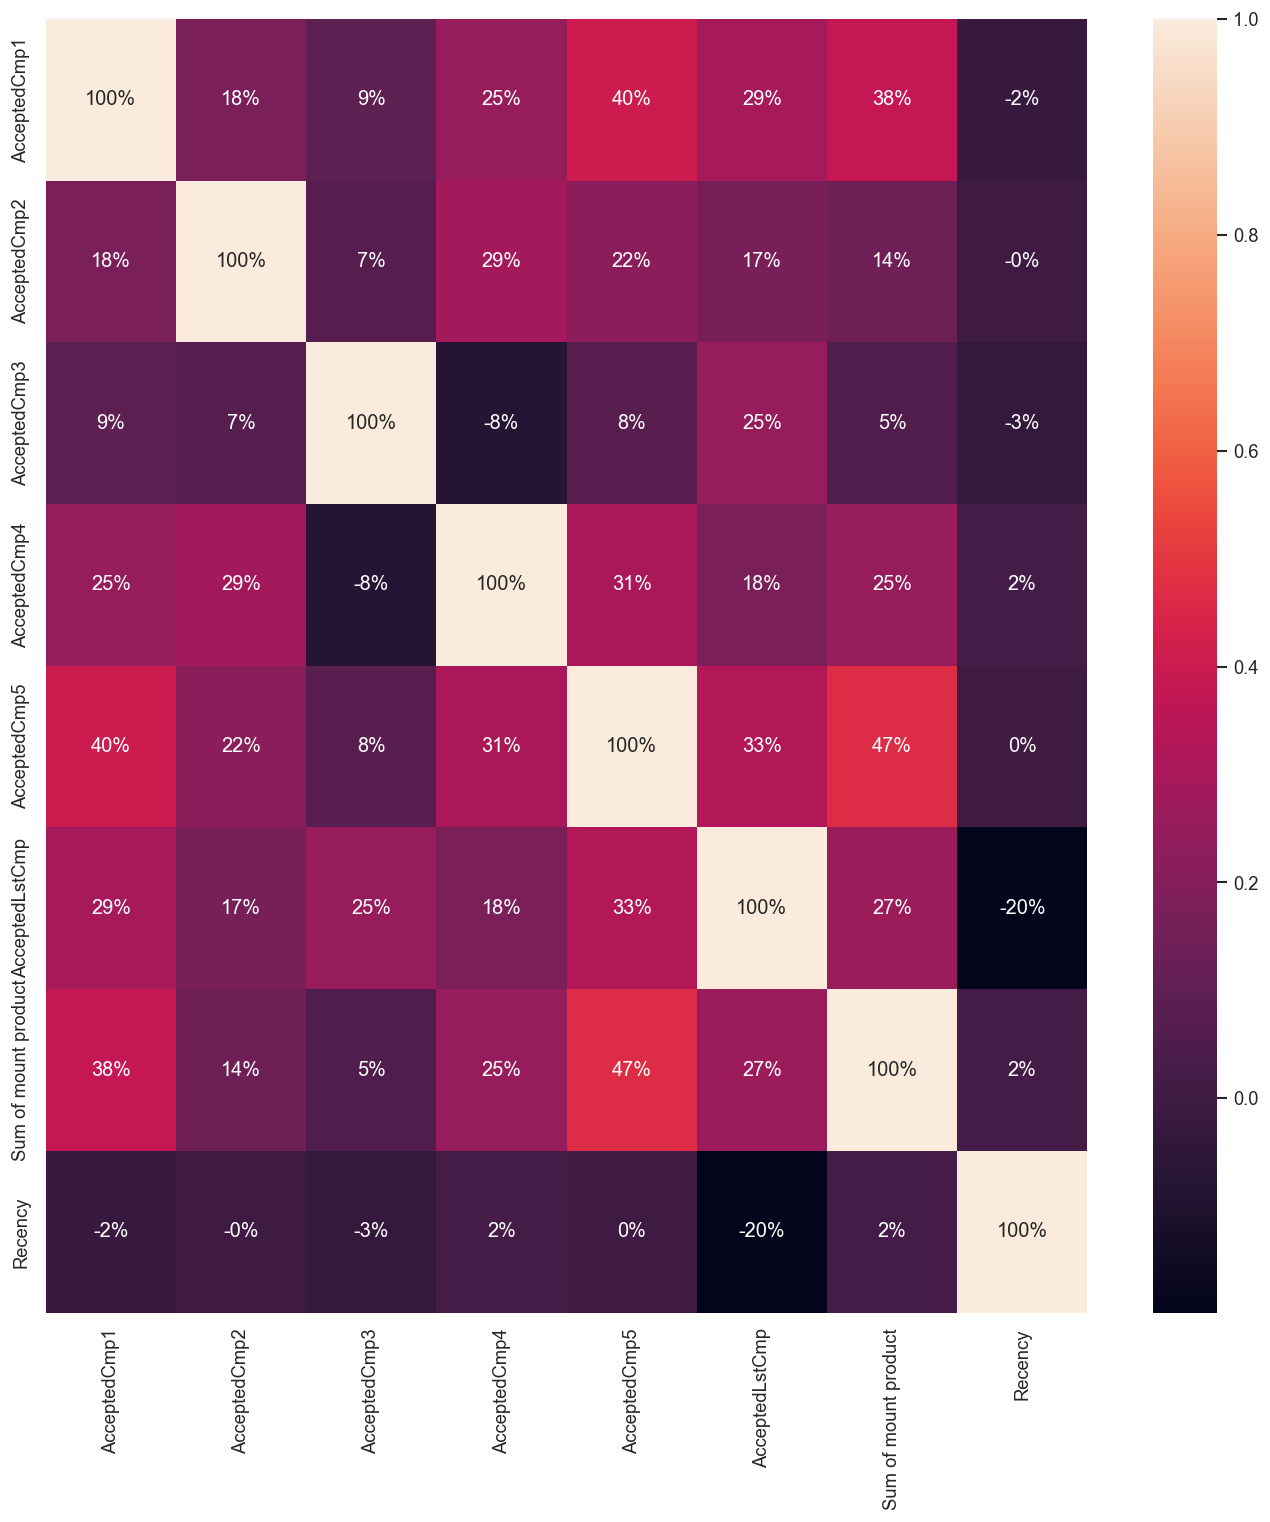

In [65]:
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(promotioncorr.corr(), annot=True, fmt='.0%')

In [42]:
customerdataset = df[['Dt_Customer', 'ID','Age','Education', 'Marital_Status', 'Income', 'Total House member', 'Sum of mount product']]

In [156]:
customercorr = dataset[['Age','Education', 'Marital_Status', 'Income', 'Family_Size', 'Living_With','Is_Parent', 'Sum of the product','TotalAcceptedCmp', 'NumDealsPurchases']]
#customercorr['Education'] = LabelEncoder().fit_transform(customercorr['Education'])
#customercorr['Marital_Status'] = LabelEncoder().fit_transform(customercorr['Marital_Status'])

In [44]:
customerdataset.head()

Dt_Customer    ID  Age   Education Marital_Status   Income  \
0  2012-04-09  5524   66  Graduation         Single  58138.0   
1  2014-08-03  2174   69  Graduation         Single  46344.0   
2  2013-08-21  4141   58  Graduation       Together  71613.0   
3  2014-10-02  6182   39  Graduation       Together  26646.0   
4  2014-01-19  5324   42         PhD        Married  58293.0   

   Total House member  Sum of mount product  
0                   1                  1617  
1                   3                    27  
2                   1                   776  
3                   2                    53  
4                   2                   422

In [45]:
customercorr.head()

Dt_Customer    ID  Age  Education  Marital_Status   Income  \
0  2012-04-09  5524   66          2               4  58138.0   
1  2014-08-03  2174   69          2               4  46344.0   
2  2013-08-21  4141   58          2               5  71613.0   
3  2014-10-02  6182   39          2               5  26646.0   
4  2014-01-19  5324   42          4               3  58293.0   

   Total House member  Sum of mount product  
0                   1                  1617  
1                   3                    27  
2                   1                   776  
3                   2                    53  
4                   2                   422

<AxesSubplot: >

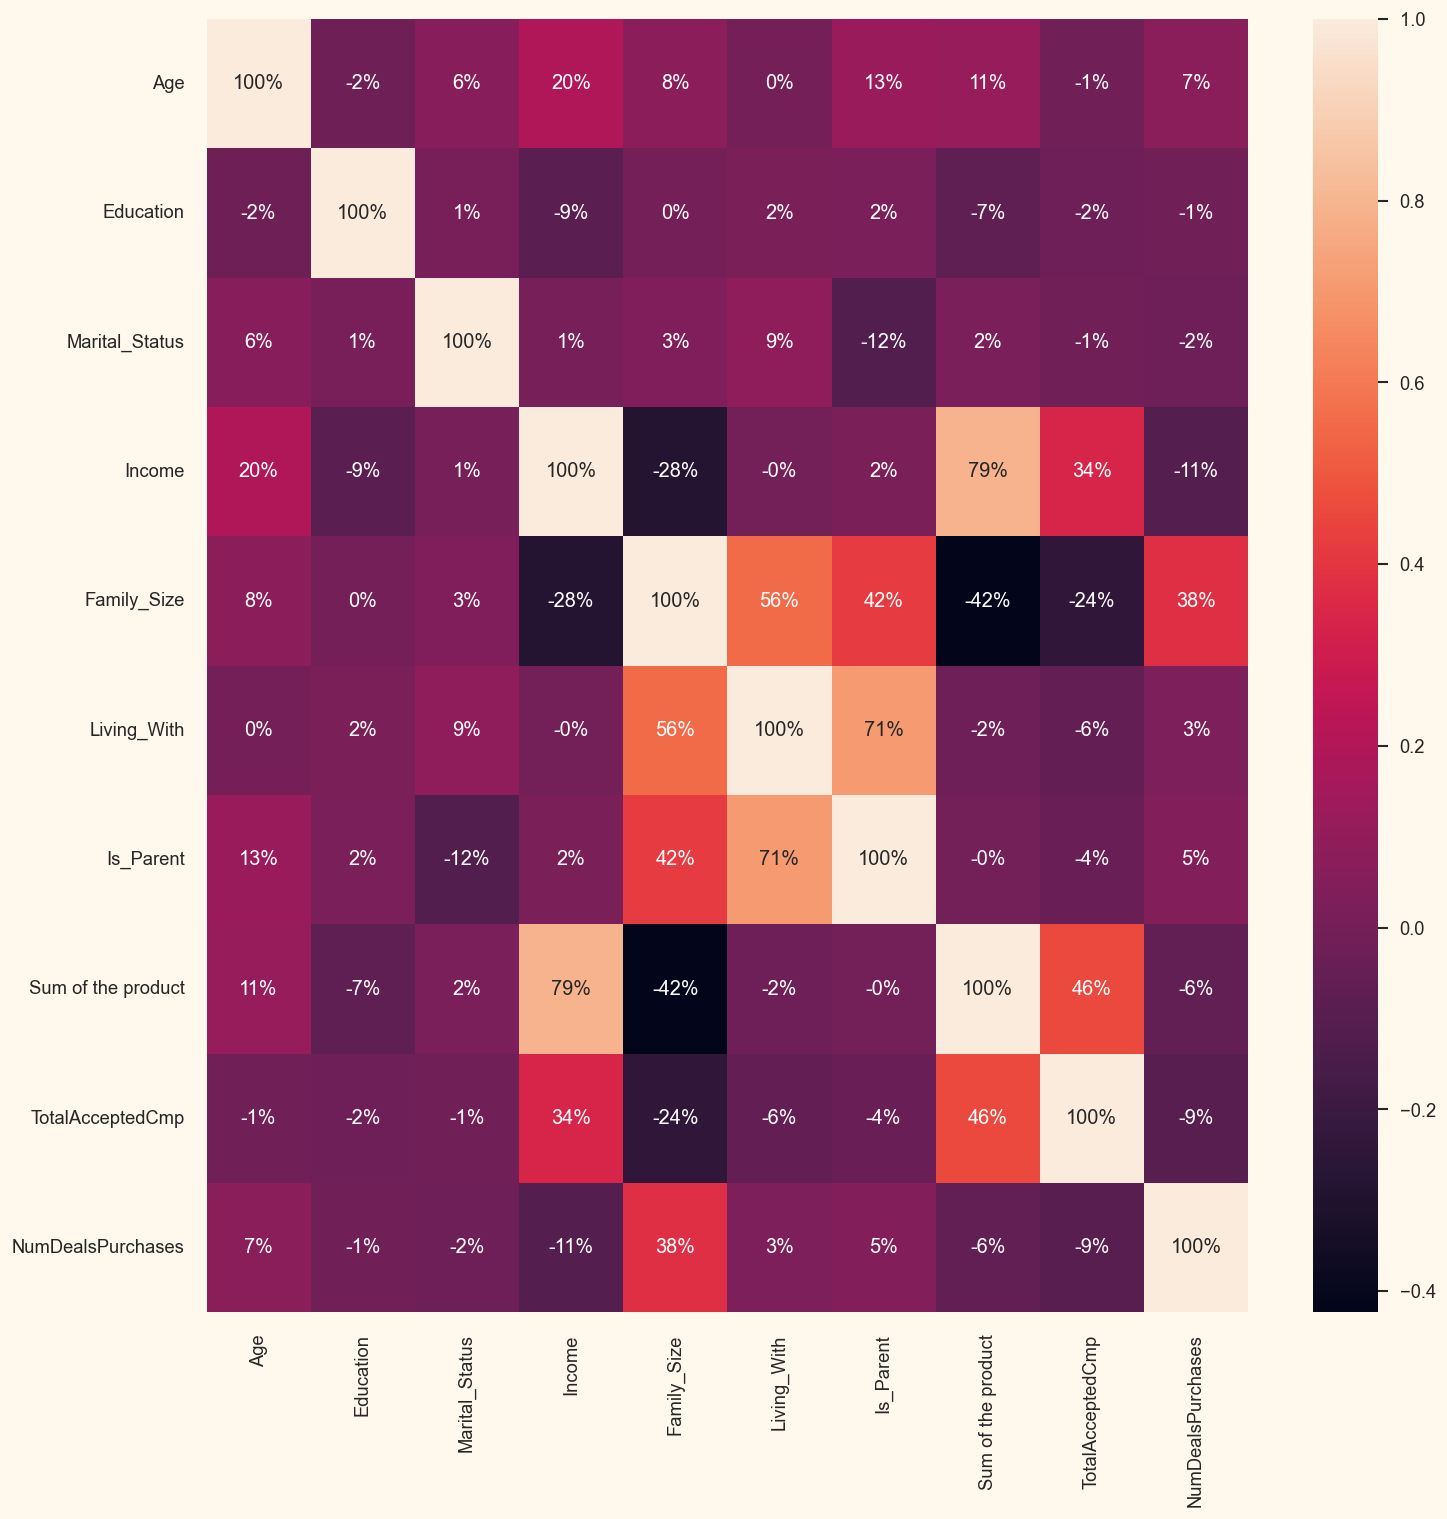

In [157]:
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(customercorr.corr(), annot=True, fmt='.0%')

In [49]:
customercorr.describe()

ID          Age    Education  Marital_Status         Income  \
count   2240.000000  2240.000000  2240.000000     2240.000000    2240.000000   
mean    5592.159821    54.194196     2.393750        3.729911   52237.975446   
std     3246.662198    11.984069     1.124797        1.076277   25037.955891   
min        0.000000    27.000000     0.000000        0.000000    1730.000000   
25%     2828.250000    46.000000     2.000000        3.000000   35538.750000   
50%     5458.500000    53.000000     2.000000        4.000000   51381.500000   
75%     8427.750000    64.000000     3.000000        5.000000   68289.750000   
max    11191.000000   130.000000     4.000000        7.000000  666666.000000   

       Total House member  Sum of mount product  
count         2240.000000           2240.000000  
mean             1.950446            605.798214  
std              0.751803            602.249288  
min              1.000000              5.000000  
25%              1.000000             68.750000  
50%              2.000000            396.000000  
75%              2.000000           1045.500000  
max              4.000000           2525.000000

In [59]:
customercorr['Income'].max() - customercorr['Income'].min()

664936.0

In [53]:
rendah = df[df['Income'] < (customercorr['Income'].mean() - (1*customercorr['Income'].std()))]
rendah

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
3      6182        1984  Graduation       Together  26646.0        1   
9      5899        1950         PhD       Together   5648.0        1   
11      387        1976       Basic        Married   7500.0        0   
14     2569        1987  Graduation        Married  17323.0        0   
21     5376        1979  Graduation        Married   2447.0        1   
...     ...         ...         ...            ...      ...      ...   
2218   4838        1978  Graduation       Together  22775.0        1   
2222  10659        1979    2n Cycle       Together   7500.0        1   
2229  10084        1972  Graduation        Married  24434.0        2   
2230   7004        1984  Graduation         Single  11012.0        1   
2232   8080        1986  Graduation         Single  26816.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Complain  \
3            0  2014-10-02       26        11  ...             0         0   
9            1  2014-03-13       68        28  ...             0         0   
11           0  2012-11-13       59         6  ...             0         0   
14           0  2012-10-10       38         3  ...             0         0   
21           0  2013-06-01       42         1  ...             0         0   
...        ...         ...      ...       ...  ...           ...       ...   
2218         0  2013-06-19       40         5  ...             0         0   
2222         0  2013-07-05        7         2  ...             0         0   
2229         0  2014-05-18        9         3  ...             0         0   
2230         0  2013-03-16       82        24  ...             0         0   
2232         0  2012-08-17       50         5  ...             0         0   

      Z_CostContact  Z_Revenue  AcceptedLstCmp  Age  House Member Size  \
3                 3         11               0   39                  1   
9                 3         11               0   73                  2   
11                3         11               0   47                  0   
14                3         11               0   36                  0   
21                3         11               0   44                  1   
...             ...        ...             ...  ...                ...   
2218              3         11               0   45                  1   
2222              3         11               0   44                  1   
2229              3         11               0   51                  2   
2230              3         11               0   39                  1   
2232              3         11               0   37                  0   

      Have house member  Total House member  Sum of mount product  
3                     1                   2                    53  
9                     1                   3                    49  
11                    0                   1                    61  
14                    0                   1                    46  
21                    1                   2                  1730  
...                 ...                 ...                   ...  
2218                  1                   2                    15  
2222                  1                   2                    53  
2229                  1                   3                    50  
2230                  1                   2                    84  
2232                  0                   1                    22  

[302 rows x 34 columns]

In [62]:
for i in customercorr['Income']:
    if i < int(customercorr['Income'].mean() - (1*customercorr['Income'].std())):
        customercorr['IncomeCategorical'] = 'Rendah'
    elif int(customercorr['Income'].mean() - (1*customercorr['Income'].std())) <= i and i < int(customercorr['Income'].mean() + (1*customercorr['Income'].std())):
        customercorr['IncomeCategorical'] = 'Sedang'
    elif int(customercorr['Income'].mean() + (1*customercorr['Income'].std())) <= i:
        customercorr['IncomeCategorical'] = 'Tinggi'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7484\3734199990.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customercorr['IncomeCategorical'] = 'Sedang'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7484\3734199990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customercorr['IncomeCategorical'] = 'Rendah'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7484\3734199990.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [63]:
customercorr.head()

Dt_Customer    ID  Age  Education  Marital_Status   Income  \
0  2012-04-09  5524   66          2               4  58138.0   
1  2014-08-03  2174   69          2               4  46344.0   
2  2013-08-21  4141   58          2               5  71613.0   
3  2014-10-02  6182   39          2               5  26646.0   
4  2014-01-19  5324   42          4               3  58293.0   

   Total House member  Sum of mount product IncomeCategorical  
0                   1                  1617            Sedang  
1                   3                    27            Sedang  
2                   1                   776            Sedang  
3                   2                    53            Sedang  
4                   2                   422            Sedang

In [78]:
customerbehaviour = df[['Dt_Customer', 'ID','Age','Education', 'Marital_Status', 'Income', 'Total House member',
                        'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntSweetProducts','Sum of mount product']]
customerbehaviour['Education'] = LabelEncoder().fit_transform(customerbehaviour['Education'])
customerbehaviour['Marital_Status'] = LabelEncoder().fit_transform(customerbehaviour['Marital_Status'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7484\2691449861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customerbehaviour['Education'] = LabelEncoder().fit_transform(customerbehaviour['Education'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7484\2691449861.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customerbehaviour['Marital_Status'] = LabelEncoder().fit_transform(customerbehaviour['Marital_Status'])


In [80]:
for i in customerbehaviour['Income']:
    if i < (customerbehaviour['Income'].mean() - (1*customerbehaviour['Income'].std())):
        customerbehaviour['IncomeCategorical'] = 'Rendah'
    elif (customerbehaviour['Income'].mean() - (1*customerbehaviour['Income'].std())) <= i and i < (customerbehaviour['Income'].mean() + (1*customerbehaviour['Income'].std())):
        customerbehaviour['IncomeCategorical'] = 'Sedang'
    elif int(customerbehaviour['Income'].mean() + (1*customerbehaviour['Income'].std())) <= i:
        customerbehaviour['IncomeCategorical'] = 'Tinggi'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7484\2064693103.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customerbehaviour['IncomeCategorical'] = 'Sedang'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7484\2064693103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customerbehaviour['IncomeCategorical'] = 'Rendah'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7484\2064693103.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [87]:
customerbehaviour['IncomeCategorical'] = OneHotEncoder().fit_transform(customerbehaviour[['IncomeCategorical','Sum of mount product']])

UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U20'), dtype('<U20')) -> None

In [86]:
customerbehaviour

<2240x1055 sparse matrix of type '<class 'numpy.float64'>'
	with 4480 stored elements in Compressed Sparse Row format>

In [85]:
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(customerbehaviour.corr(), annot=True, fmt='.0%')

AttributeError: corr not found

<Figure size 1680x1680 with 0 Axes>